# Изучение рынка заведений общественного питания Москвы

- Автор: Игнатьева Екатерина

### Цели и задачи проекта
**Цель**: Изучить рынок заведений общественного питания и провести исследовательский анализ рынка Москвы.
___

### Описание данных

Для анализа поступили данные о рынке заведений общественного питания Москвы.


Данные состоят из двух датасетов: 
 - `/datasets/rest_info.csv` - содержит информацию о заведениях общественного питания
 - `/datasets/rest_price.csv` - содержит информацию о среднем чеке в заведениях общественного питания
 

**Датасет `/datasets/rest_info.csv`:**
 - `name` — название заведения;
 - `address` — адрес заведения;
 - `district` — административный район, в котором находится заведение, например Центральный административный округ;
 - `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
 - `hours` — информация о днях и часах работы;
 - `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
 - `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    - 0 — заведение не является сетевым;
    - 1 — заведение является сетевым.
 - `seats` — количество посадочных мест.


**Датасет `/datasets/rest_price.csv`:**
 - `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
 - `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
    - «Средний счёт: 1000–1500 ₽»;
    - «Цена чашки капучино: 130–220 ₽»;
    - «Цена бокала пива: 400–600 ₽».и так далее;
 - `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
 - `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Цена одной чашки капучино»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.


### Содержимое проекта

1. Загрузка данных и знакомство с ними
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.
---

## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [6]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
!pip install phik
from phik import phik_matrix

#Загружаем библиотеку numpy
import numpy as np


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [7]:
#  Выгружаем данные в переменные rest_info_df и rest_price_df
rest_info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

- Познакомьтесь с данными и изучите общую информацию о них.

In [9]:
# Выводим первые строки датасета /datasets/rest_info.csv
rest_info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [10]:
# Выводим информацию о датафрейме rest_info_df
rest_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [11]:
# Выводим первые строки датасета /datasets/rest_price.csv
rest_price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [12]:
# Выводим информацию о датафрейме /datasets/rest_price.csv
rest_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


---
### Промежуточный вывод

Датасет `/datasets/rest_info.csv`  содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания.

После первичного анализа данных можно сделать следующие выводы:

* Название столбцов приведено к нижнему регистру, что соответствует общепринятым стандартам.

* Столбцы содержат типы данных:
    - `id`, `name`, `category`, `address`, `district`, `hours`  - тип **`object`**: в данных используется верный тип данных, менять его не требуется, так как в столбцах хранится текстовая информация.
    - `rating`, `seats` - тип **`float64`**: `rating` имеет верный тип данных, так как в столбцах хранятся информация о рейтинге заведения и числа могут быть с плавающей точкой. В столбце `seats` можно изменить тип данных на `int64`, так как количество посадочных мест не может быть дробным числом.
    - `chain` - тип **`int64`**: данные имеют верный тип данных, так как в столбце хранится значения 0 и 1, которое показывает, является ли заведение сетевым или нет.

* Пропуски содержатся в столбцах `hours` - 7870 заполнено из 8406 = (536 пропусков) и `seats` - 4795 заполнено из 8406 = (3611 пропусков). Это значительное количество пропусков, которое может повлиять на анализ. Необходимо рассмотреть методы заполнения пропусков или удаление строк с пропусками. 

* Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Датасет `/datasets/rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания.

После первичного анализа данных можно сделать следующие выводы:

* Название столбцов приведено к одному виду snake case, что соответствует общепринятым стандартам.
* Столбцы содержат типы данных:
    - `id`, `price`, `avg_bill` - тип **`object`**: в данных используется верный тип данных,так как в столбцах хранится текстовая информация.
    - `middle_avg_bill`, `middle_coffee_cup` - тип **`float64`**: имеет верный тип данных, так как в столбцах хранятся числа с плавающей точкой.
* Пропуски содержатся в столбцах:
    - `price` - 3315 заполнено из 4058 = (743 пропусков);
    - `avg_bill` - 3816 заполнено из 4058 = (242 пропусков);
    - `middle_avg_bill` - 3149 заполнено из 4058 = (909 пропусков);
    - `middle_coffee_cup` - 535 заполнено из 4058 = (3523 пропусков);
 - Это значительное количество пропусков, которое может повлиять на анализ. Необходимо рассмотреть методы заполнения пропусков или удаление строк с пропусками.
* Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

### Подготовка единого датафрейма

- Объединим данные двух датасетов в один и продолжим работу.

In [17]:
# Обьединяем данные в один датафрейм (rest_info_df и rest_price_df)
df = rest_info_df.merge(rest_price_df, on='id', how='outer')

In [18]:
# Выводим общую информацию по новому датафрейму
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


In [19]:
# Выводим первые строки по новому датафрейму
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0009f005d6fb47c6b067db5084f4e05a,Кафе Лоза,ресторан,"Москва, Череповецкая улица, 4А",Северо-Восточный административный округ,"ежедневно, круглосуточно",4.2,0,85.0,средние,Средний счёт:500–800 ₽,650.0,NaN
1,000c4f8e2c6b4a8e81127ed094688658,ДоброЛавка,кофейня,"Москва, Столярный переулок, 3к13",Центральный административный округ,"пн-пт 09:00–21:00; сб,вс 10:00–21:00",4.4,0,NaN,средние,Цена чашки капучино:150–190 ₽,NaN,170.0
2,0028eb1543284e18a0acdb0343a66107,Кафе Бульвар. Шашлык-Сити,кафе,"Москва, 7-я Парковая улица, 15, стр. 3",Восточный административный округ,"ежедневно, 11:00–00:00",4.3,0,NaN,NaN,NaN,NaN,NaN
3,002a2a1a30b84ad1883408ad5cec661f,Булошная,кофейня,"Москва, Новочерёмушкинская улица, 58",Юго-Западный административный округ,"ежедневно, 09:00–22:00",4.4,1,20.0,NaN,NaN,NaN,NaN
4,002c7e0b7c294daf944229bc10597566,J&j Cafe Moscow,кофейня,"Москва, Верхняя Красносельская улица, 16",Центральный административный округ,пн-пт 09:00–18:00,4.1,0,NaN,средние,Цена чашки капучино:170–250 ₽,NaN,210.0


## 2. Предобработка данных

Подготовим данные к исследовательскому анализу:

- Изучим корректность типов данных и при необходимости проведем их преобразование.

In [21]:
# Меняем тип данных в столбце seats с float64 на int64
df['seats'] = np.floor(pd.to_numeric(df['seats'], errors='coerce')).astype('Int64')

In [22]:
# Выводим инфо для проверки типа данных 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   Int64  
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: Int64(1), float64(3), int64(1), object(8)
memory usage: 862.1+ KB


- Изучим пропущенные значения в данных.

In [24]:
# Выводим количество пропусков
df.isna().sum().sort_values(ascending=False)

middle_coffee_cup    7871
middle_avg_bill      5257
price                5091
avg_bill             4590
seats                3611
hours                 536
id                      0
name                    0
category                0
address                 0
district                0
rating                  0
chain                   0
dtype: int64

In [25]:
# Выводим процент пропусков с округлением до двух знаков
round((df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False),2)

middle_coffee_cup    93.64
middle_avg_bill      62.54
price                60.56
avg_bill             54.60
seats                42.96
hours                 6.38
id                    0.00
name                  0.00
category              0.00
address               0.00
district              0.00
rating                0.00
chain                 0.00
dtype: float64

- Проверим данные на явные и неявные дубликаты.

In [27]:
# Выводим уникальные значения по столбцам name, address для обнаружения неявных дубликатов
unique_name = df['name'].unique()
unique_address = df['address'].unique()

display(unique_name, unique_address)

array(['Кафе Лоза', 'ДоброЛавка', 'Кафе Бульвар. Шашлык-Сити', ...,
       'Вкус Азербайджана', 'Лебяжье', 'Гивисациви'], dtype=object)

array(['Москва, Череповецкая улица, 4А',
       'Москва, Столярный переулок, 3к13',
       'Москва, 7-я Парковая улица, 15, стр. 3', ...,
       'Москва, Ленинградский проспект, 31А', 'Москва, Майский просек, 2',
       'Москва, Бутырская улица, 89, стр. 2'], dtype=object)

In [28]:
# Выводим количество уникальных значений по столбцам name, address
unique_name_count = df['name'].nunique()
unique_address_count = df['address'].nunique()

display('Уникальные значения')
display(unique_name_count, unique_address_count)

'Уникальные значения'

5614

5753

In [29]:
# Приведем данные столбца name к нижнему регистру и удаляем пробелы для удаления неявных дубликатов
df['name'] = df['name'].str.lower().str.strip()
display(df['name'])

0                       кафе лоза
1                      добролавка
2       кафе бульвар. шашлык-сити
3                        булошная
4                 j&j cafe moscow
                  ...            
8401                хинкали point
8402    madison restaurant & club
8403            вкус азербайджана
8404                      лебяжье
8405                   гивисациви
Name: name, Length: 8406, dtype: object

In [30]:
# Поиск дубликатов по ключевым полям name, address
duplicates = df[df.duplicated(subset=['name', 'address'], keep=False)]

In [31]:
# Вывод дубликатов
display(duplicates.head())

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
1932,3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,"Москва, Ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276,NaN,NaN,NaN,NaN
3205,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188,NaN,NaN,NaN,NaN
5432,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188,NaN,NaN,NaN,NaN
5580,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","Москва, проспект Мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150,NaN,NaN,NaN,NaN
6474,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"Москва, проспект Мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150,NaN,NaN,NaN,NaN


In [32]:
# Выводим количество дубликатов
df.duplicated().sum()

0

- Для дальнейшей работы создаем столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [34]:
# Создаем функцию для проверки, работает ли заведение 24/7
def is_24_7(hours):
    try:
        if 'ежедневно, круглосуточно' in hours.lower():
            return True
        if 'пн-вс' in hours.lower():
            if '00:00-23:59' in hours or '00:00-00:00' in hours:
                return True
    except AttributeError:      
        return False
    return False

In [35]:
# Создаем новый столбец в датафрейме is_24_7
df['is_24_7'] = df['hours'].apply(is_24_7)

In [36]:
# Выводим инфо
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   Int64  
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
 13  is_24_7            8406 non-null   bool   
dtypes: Int64(1), bool(1), float64(3), int64(1), object(8)
memory usage: 870.3+ KB


In [37]:
# Выводим первые строки датафрейма с новым столбцом is_24_7
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0009f005d6fb47c6b067db5084f4e05a,кафе лоза,ресторан,"Москва, Череповецкая улица, 4А",Северо-Восточный административный округ,"ежедневно, круглосуточно",4.2,0,85,средние,Средний счёт:500–800 ₽,650.0,NaN,True
1,000c4f8e2c6b4a8e81127ed094688658,добролавка,кофейня,"Москва, Столярный переулок, 3к13",Центральный административный округ,"пн-пт 09:00–21:00; сб,вс 10:00–21:00",4.4,0,<NA>,средние,Цена чашки капучино:150–190 ₽,NaN,170.0,False
2,0028eb1543284e18a0acdb0343a66107,кафе бульвар. шашлык-сити,кафе,"Москва, 7-я Парковая улица, 15, стр. 3",Восточный административный округ,"ежедневно, 11:00–00:00",4.3,0,<NA>,NaN,NaN,NaN,NaN,False
3,002a2a1a30b84ad1883408ad5cec661f,булошная,кофейня,"Москва, Новочерёмушкинская улица, 58",Юго-Западный административный округ,"ежедневно, 09:00–22:00",4.4,1,20,NaN,NaN,NaN,NaN,False
4,002c7e0b7c294daf944229bc10597566,j&j cafe moscow,кофейня,"Москва, Верхняя Красносельская улица, 16",Центральный административный округ,пн-пт 09:00–18:00,4.1,0,<NA>,средние,Цена чашки капучино:170–250 ₽,NaN,210.0,False


In [38]:
# Количество заведений работающих ежедневно и круглосуточно
count_true = df['is_24_7'].sum()

display(f'Количество заведений работающих 24/7: {count_true}')

'Количество заведений работающих 24/7: 730'

---
### Промежуточный вывод


**Промежуточный вывод по результатам предобработки данных**

1. Названия столбцов и их обработка:
   - Проведена обработка столбцов `name` и `address` для выявления неявных дубликатов.
   - Приведены данные столбца `name` к нижнему регистру и удалены лишние пробелы.
   - Создан новый столбец `is_24_7`, который указывает, работает ли заведение круглосуточно (логические значения `True` или `False`). Выявлено количество заведений работающих 24/7: 730.

2. Типы данных:
   - Изменен тип данных в столбце `seats` с `float64` на `int64`.

3. Обработка пропусков:
   - Проанализированы пропуски в столбцах:
     - `middle_coffee_cup`: 7871 пропусков (93.64%).
     - `middle_avg_bill`: 5257 пропусков (62.54%).
     - `price`: 5091 пропусков (60.56%).
     - `avg_bill`: 4590 пропусков (54.60%).
     - `seats`: 3611 пропусков (42.96%).
     - `hours`: 536 пропусков (6.38%).
     

4. Анализ пропусков:
   - Были выведены количество и процент пропусков по каждому столбцу. Наибольший процент пропусков наблюдается в столбце `middle_coffee_cup` (93.64%), а наименьший — в столбце `hours` (6.38%).

5. Обработка дубликатов:
   - Проведен поиск неявных дубликатов по ключевым полям `name` и `address`.
   - После обработки (приведение к нижнему регистру и удаление пробелов) дубликаты не обнаружены (`df.duplicated().sum()` вернул 0).

**Итог**:
- Данные были очищены от неявных дубликатов, в столбце `seats` тип данных изменен на `int64`.
- Процент пропусков в данных варьируется от 6.38% до 93.64%. Так как количество пропусков достатольно большое было принято решение оставить данные в исходном виде, чтобы не исказить данные для анализа.
- Дубликаты в данных отсутствуют, что подтверждает корректность проведенной очистки.

В результате данные стали более структурированными и пригодными для дальнейшего анализа, что важно для построения точных выводов.

## 3. Исследовательский анализ данных
Проведем исследовательский анализ исходных данных.
При исследовании данных используем визуализации.

---

### Задача 1

Какие категории заведений представлены в данных? 

In [44]:
# Выводим все уникальные категории из столбца category
display(df['category'].unique())

array(['ресторан', 'кофейня', 'кафе', 'бар,паб', 'быстрое питание',
       'пиццерия', 'столовая', 'булочная'], dtype=object)

In [45]:
# Выводим информацию по категориям представленных в датафрейме
display('Количество объектов общественного питания по каждой категории:')
df['category'].value_counts()

'Количество объектов общественного питания по каждой категории:'

category
кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: count, dtype: int64

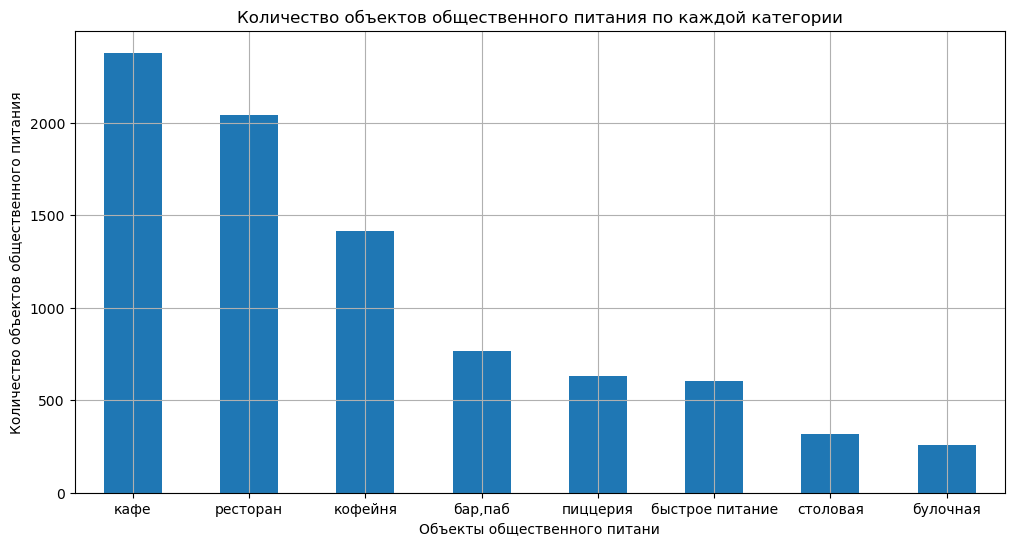

In [46]:
# Создаем график matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['category'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               ylabel='Количество объектов общественного питания', # Называем ось
               xlabel='Объекты общественного питани', # Называем ось
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Количество объектов общественного питания по каждой категории' # Называем график
)
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

**Промежуточные наблюдения**

- В данных представленны заведения следующих категорий:
    - кафе, ресторан, кофейня, пиццерия, бар паб, быстрое питание, булочная, столовая.
- Количество объектов общественного питания по каждой категории:
    - кафе:2378
    - ресторан:2043
    - кофейня:1413
    - бар,паб:765
    - пиццерия:633
    - быстрое питание:603
    - столовая:315
    - булочная:256
    
1. Наиболее представленной категорией являются **кафе** (2378 заведений), что может указывать на их популярность или востребованность в данном регионе.

2. Второй по количеству категорией являются **рестораны** (2043 заведения), что также свидетельствует о значительной доле заведений с полноценным обслуживанием.

3. **Кофейни** занимают третье место (1413 заведений), что отражает тенденцию к популярности заведений для неформальных встреч и кофейной культуры.

4. Менее представлены **бары и пабы** (765), **пиццерии** (633) и **заведения быстрого питания** (603), что может говорить о меньшей распространённости этих форматов.

5. Наименее представленными категориями являются **столовые** (315) и **булочные** (256), что может быть связано с их узкой специализацией или меньшей популярностью среди потребителей.

**Итог:**  
Кафе и рестораны доминируют среди представленных категорий, что может указывать на их высокую востребованность. При этом менее специализированные форматы, такие как столовые и булочные, встречаются значительно реже.  

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? 

In [49]:
# Выводим все уникальные административные районы из столбца district
district_counts = df['district'].value_counts().reset_index()

display(district_counts)

,district,count
0,Центральный административный округ,2242
1,Северный административный округ,900
2,Южный административный округ,892
3,Северо-Восточный административный округ,891
4,Западный административный округ,851
5,Восточный административный округ,798
6,Юго-Восточный административный округ,714
7,Юго-Западный административный округ,709
8,Северо-Западный административный округ,409


In [50]:
# Создаем сводную таблицу, где показана информация о количестве заведений в разрезе административных районов
pivot_district = pd.pivot_table(df,
                                index='district',
                                columns='category',
                                values='name',
                                aggfunc='count',
                                fill_value=0
                               )

display(pivot_district)

category,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая
district,,,,,,,,
Восточный административный округ,53,25,71,272,105,72,160,40
Западный административный округ,50,37,62,239,150,71,218,24
Северный административный округ,68,39,58,235,193,77,189,41
Северо-Восточный административный округ,63,28,82,269,159,68,182,40
Северо-Западный административный округ,23,12,30,115,62,40,109,18
Центральный административный округ,364,50,87,464,428,113,670,66
Юго-Восточный административный округ,38,13,67,282,89,55,145,25
Юго-Западный административный округ,38,27,61,238,96,64,168,17
Южный административный округ,68,25,85,264,131,73,202,44


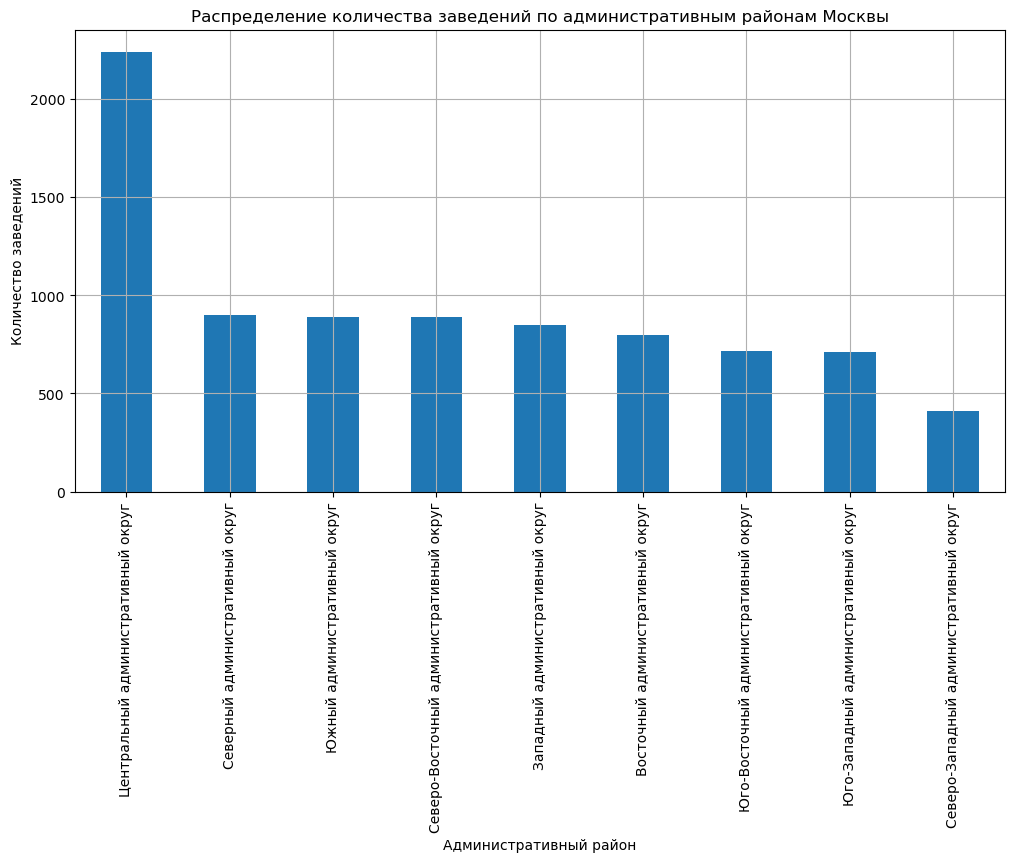

In [51]:
# Создаем график matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['district'].value_counts().plot(kind='bar', # Тип графика - столбчатая диаграмма
                                   ylabel='Количество заведений', # Называем ось Y
                                   xlabel='Административный район', # Называем ось X
                                   rot=90, # Градус вращения подписи по оси Х
                                   legend=False, # Выключаем легенду
                                   title='Распределение количества заведений по административным районам Москвы')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

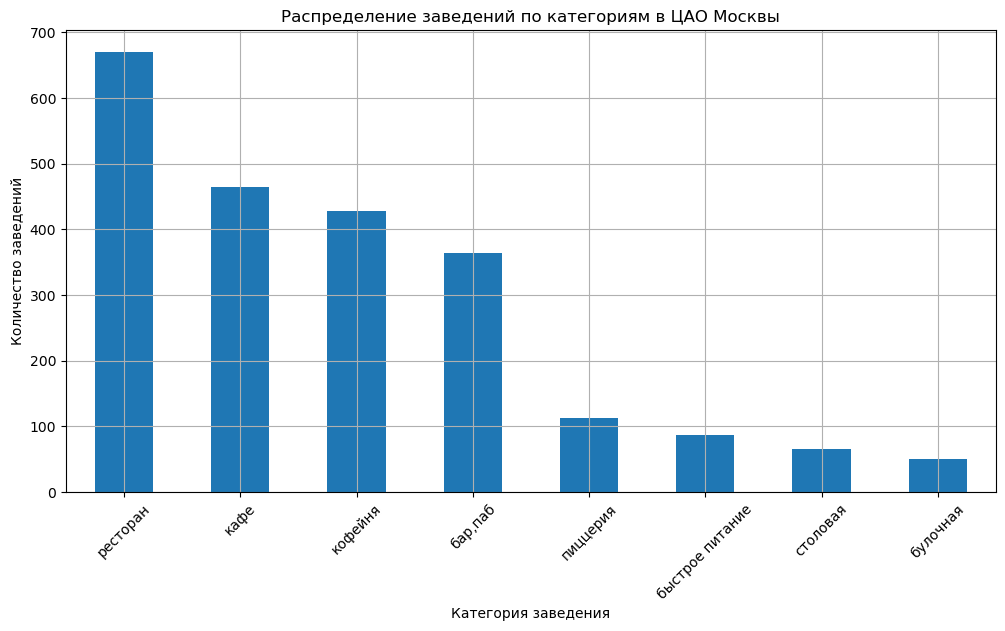

In [52]:
# Фильтруем данные для центрального административного округа (ЦАО)
central_district_data = df[df['district'] == 'Центральный административный округ']

# Создаем график matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
central_district_data['category'].value_counts().plot(kind='bar', # Тип графика - столбчатая диаграмма
                                                      ylabel='Количество заведений', # Называем ось Y
                                                      xlabel='Категория заведения', # Называем ось X
                                                      rot=45, # Градус вращения подписи по оси Х
                                                      legend=False, # Выключаем легенду
                                                      title='Распределение заведений по категориям в ЦАО Москвы'
                                                     )

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

**Промежуточные наблюдения**

1.  Административные районы Москвы, присутствующие в данных и распределение количества заведений по ним: 
   - Центральный административный округ: **2242** заведений
   - Северный административный округ: **900** заведений
   - Южный административный округ: **892** заведений
   - Северо-Восточный административный округ: **891** заведений
   - Западный административный округ: **851** заведений
   - Восточный административный округ: **798** заведений
   - Юго-Восточный административный округ: **714** заведений
   - Юго-Западный административный округ: **709** заведений
   - Северо-Западный административный округ: **409** заведений

- 1.1. Наибольшее количество заведений сосредоточено в Центральном административном округе (2242), что значительно больше, чем в других округах. Наименьшее количество заведений находится в Северо-Западном административном округе (409).


2. **Распределение заведений по категориям в Центральном административном округе:**
   - Бар, паб: **364**
   - Булочная: **50**
   - Быстрое питание: **87**
   - Кафе: **464**
   - Кофейня: **428**
   - Пиццерия: **113**
   - Ресторан: **670**
   - Столовая: **66**

- 2.2. В Центральном административном округе наибольшее количество заведений приходится на рестораны (670) и кафе (464). Наименьшее количество заведений — это столовые (66) и булочные (50).

**Итог:**
- Центральный административный округ лидирует по количеству заведений, причем в нем преобладают рестораны и кафе.
- Северо-Западный административный округ имеет наименьшее количество заведений.
- В Центральном округе наблюдается значительное разнообразие заведений, с преобладанием ресторанов и кафе.


---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? 

In [55]:
# Выводи количество сетевых и не сетевых заведений, где 0 - не является сетевым, а 1 - является сетевым
chain_counts = df.groupby('chain')['category'].count().reset_index
display(chain_counts)

<bound method Series.reset_index of chain
0    5201
1    3205
Name: category, dtype: int64>

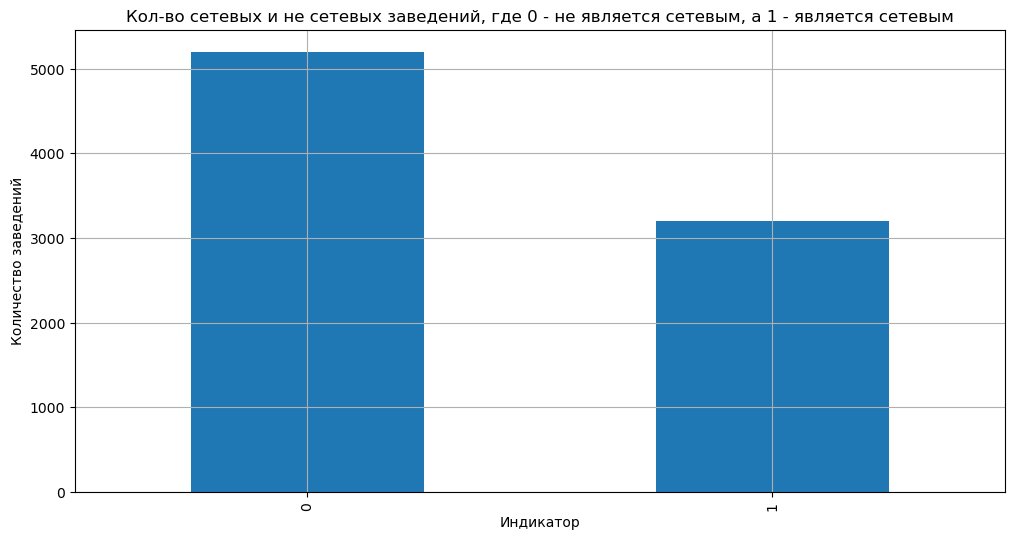

In [56]:
# Создаем график matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['chain'].value_counts().plot(kind='bar', # Тип графика - столбчатая диаграмма
                                ylabel='Количество заведений', # Называем ось Y
                                xlabel='Индикатор', # Называем ось X
                                rot=90, # Градус вращения подписи по оси Х
                                legend=False, # Выключаем легенду
                                title='Кол-во сетевых и не сетевых заведений, где 0 - не является сетевым, а 1 - является сетевым' 
                               )

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

In [57]:
# Группируем данные по категориям и считаем долю сетевых заведений
category_chain_1 = df.groupby('category')['chain'].mean().sort_values(ascending=False) * 100
               
# Выведем результат
display('Доля сетевых заведений по категориям:')
display(round(category_chain_1,2))

'Доля сетевых заведений по категориям:'

category
булочная           61.33
пиццерия           52.13
кофейня            50.96
быстрое питание    38.47
ресторан           35.73
кафе               32.76
столовая           27.94
бар,паб            22.09
Name: chain, dtype: float64

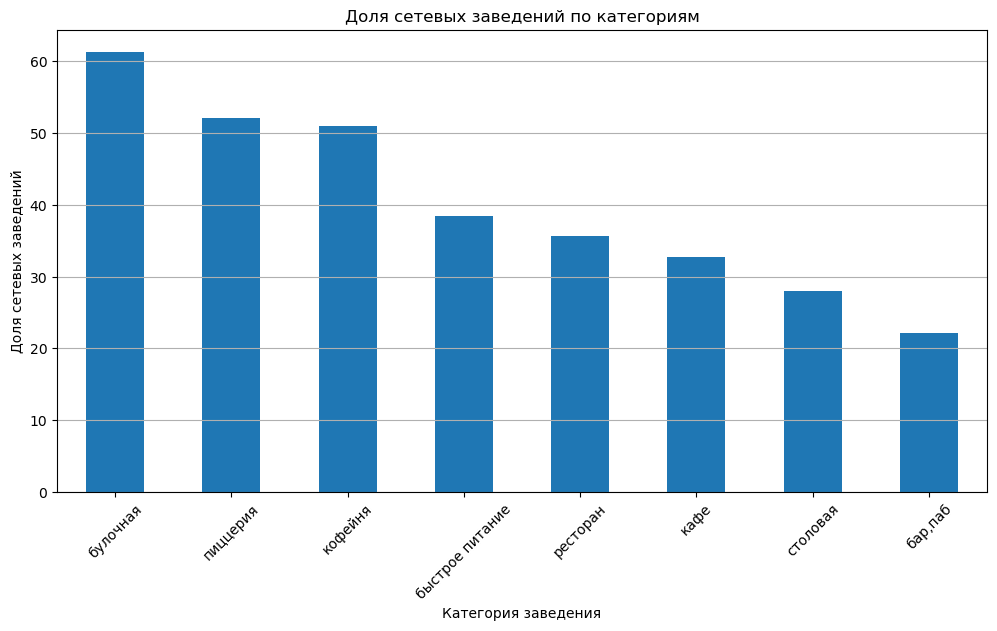

In [58]:
# Создаем график matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
category_chain_1.plot(kind='bar',
                      rot=45,
                      xlabel='Категория заведения',
                      ylabel='Доля сетевых заведений',
                      title='Доля сетевых заведений по категориям'
                     )
# Добавляем сетку графика по оси Y
plt.grid(axis='y')

# Выводим график
plt.show()

**Промежуточные наблюдения**

1. Согласно данным, несетевых заведений больше, чем сетевых:  
   - Несетевые заведения (0): **5201**  
   - Сетевые заведения (1): **3205**  

   **Итог:** Несетевых заведений больше.
---
2. Наибольшая доля сетевых заведений наблюдается в следующих категориях:  
   - **Булочная**: 61.33%  
   - **Пиццерия**: 52.13%  
   - **Кофейня**: 50.96%  

   **Итог:** Чаще всего сетевыми являются булочные, пиццерии и кофейни.
---

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны?

In [61]:
# Описательная статистика по количеству посадочных мест
seats_stats = df.groupby('category')['seats'].describe().sort_values(by='50%', ascending=False).reset_index()
display(seats_stats)

,category,count,mean,std,min,25%,50%,75%,max
0,ресторан,1270.0,121.944094,123.757335,0.0,48.0,86.0,150.0,1288.0
1,"бар,паб",468.0,124.532051,145.011574,0.0,48.0,82.5,150.0,1288.0
2,кофейня,751.0,111.199734,127.837772,0.0,40.0,80.0,144.0,1288.0
3,столовая,164.0,99.75,122.951453,0.0,40.0,75.5,117.0,1200.0
4,быстрое питание,349.0,98.891117,106.611739,0.0,28.0,65.0,140.0,1040.0
5,кафе,1218.0,97.512315,117.985084,0.0,35.25,60.0,120.0,1288.0
6,пиццерия,427.0,94.496487,112.282703,0.0,30.0,55.0,120.0,1288.0
7,булочная,148.0,89.385135,97.685844,0.0,25.0,50.0,120.0,625.0


In [62]:
# Получаем список категорий, отсортированных по убыванию медианы
sorted_categories = seats_stats['category']

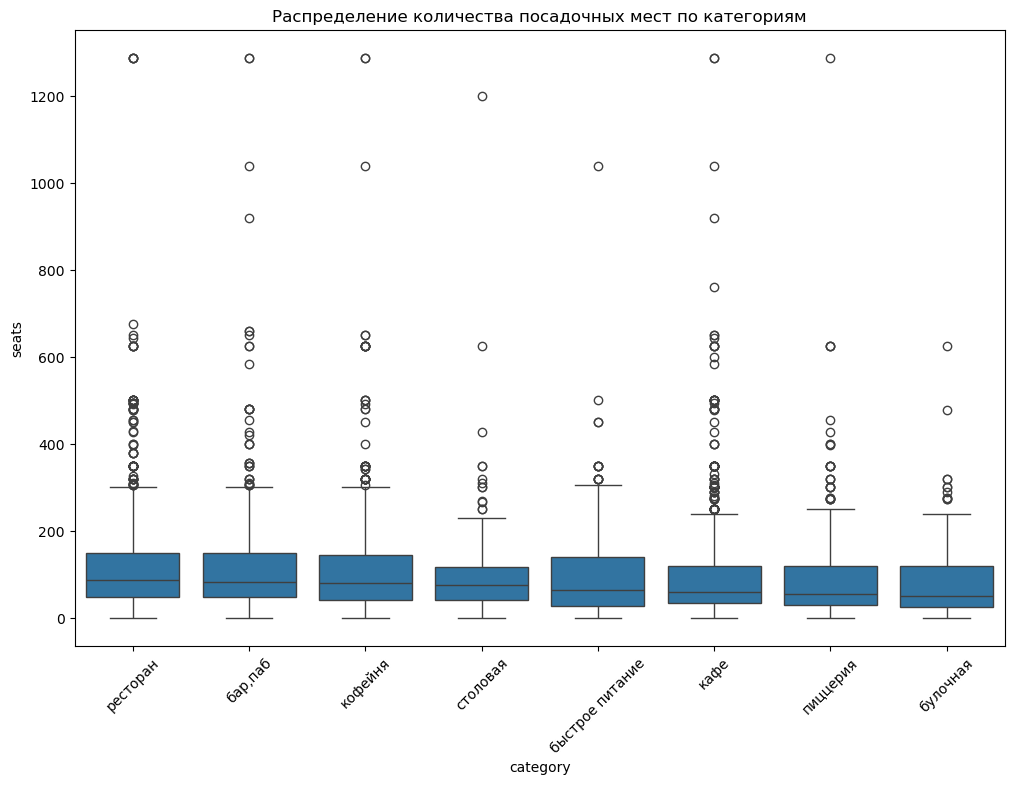

In [63]:
# Визуализация распределения посадочных мест
plt.figure(figsize=(12, 8))

# Построим диаграмму размаха («ящик с усами»)
sns.boxplot(data=df,
            x='category', 
            y='seats',
            order=sorted_categories)

plt.xticks(rotation=45)
plt.title('Распределение количества посадочных мест по категориям')

# Выводим график
plt.show()

In [64]:
# Функция для выявления выбросов
def detect_outliers(df, category):
    subset = df[df['category'] == category]
    Q1 = subset['seats'].quantile(0.25)
    Q3 = subset['seats'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = subset[(subset['seats'] < lower_bound) | (subset['seats'] > upper_bound)]
    return outliers

# Применяем функцию для каждой категории
outliers = pd.concat([detect_outliers(df, category) for category in df['category'].unique()])

# Выводим выбросы
display('Выбросы в данных:')
display(outliers)

'Выбросы в данных:'

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
9,004f8701bd584064952e70108e96502c,белочка,ресторан,"Москва, улица Ленинская Слобода, 19",Южный административный округ,пн-пт 12:00–17:00,3.4,0,450,NaN,NaN,NaN,NaN,False
125,046bbad5229442fca1cefa41cbf7dd9b,495,ресторан,"Москва, Олимпийский проспект, 18/1",Центральный административный округ,"ежедневно, 08:00–23:00",4.8,0,481,NaN,NaN,NaN,NaN,False
279,094bd6416e16465f8a30aeab3ed123d2,цимес,ресторан,"Москва, Комсомольский проспект, 28",Центральный административный округ,"пн-пт 09:00–23:00; сб,вс 10:00–23:00",4.4,0,400,высокие,Средний счёт:2000–2500 ₽,2250.0,NaN,False
395,0cb7bdd390bb4163a956ae743b41f8e4,siam,ресторан,"Москва, Лесная улица, 20, стр. 3",Центральный административный округ,"пн-чт 10:00–23:00; пт,сб 10:00–02:00; вс 10:00...",4.1,0,500,NaN,Средний счёт:950–1200 ₽,1075.0,NaN,False
406,0d061448953e441d87b65c3f475a1be1,султан палас,ресторан,"Москва, Грайвороновская улица, 12, корп. 2",Юго-Восточный административный округ,"ежедневно, 11:00–02:00",4.3,0,500,выше среднего,Средний счёт:1000–1500 ₽,1250.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237,a10aa826323942a98d4510d73fff5a8c,штолле,булочная,"Москва, Осенний бульвар, 16, корп. 1",Западный административный округ,"ежедневно, 08:00–21:00",4.2,1,300,NaN,NaN,NaN,NaN,False
5784,b211397911754d9a8ac034813631be4b,шеф concept,булочная,"Москва, проспект Мира, 101, стр. 2",Северо-Восточный административный округ,пн-пт 08:30–18:00,4.3,0,273,средние,Средний счёт:220–350 ₽,285.0,NaN,False
6172,bdcf039d316e4939affea234567d629b,remy kitchen bakery,булочная,"Москва, Пресненская набережная, 8, стр. 1",Центральный административный округ,"ежедневно, 08:00–00:00",4.4,1,478,средние,Средний счёт:500–1500 ₽,1000.0,NaN,False
7651,e91571fe60f04a179dcc9bb8b25d101f,печорин,булочная,"Москва, Ленинский проспект, 108, стр. 1",Западный административный округ,"ежедневно, 09:00–22:00",4.7,1,290,NaN,NaN,NaN,NaN,False


In [65]:
# Вычисляем медиану для каждой категории с сортировкой по медиане 
typical_seats = df.groupby('category')['seats'].median().reset_index()
typical_seats.columns = ['category', 'median_seats']
# Сортировка данных по медиане
typical_seats_sorted = typical_seats.sort_values('median_seats', ascending=False)

display('Типичное количество посадочных мест (медиана):')
display(typical_seats_sorted)

'Типичное количество посадочных мест (медиана):'

,category,median_seats
6,ресторан,86.0
0,"бар,паб",82.5
4,кофейня,80.0
7,столовая,75.5
2,быстрое питание,65.0
3,кафе,60.0
5,пиццерия,55.0
1,булочная,50.0


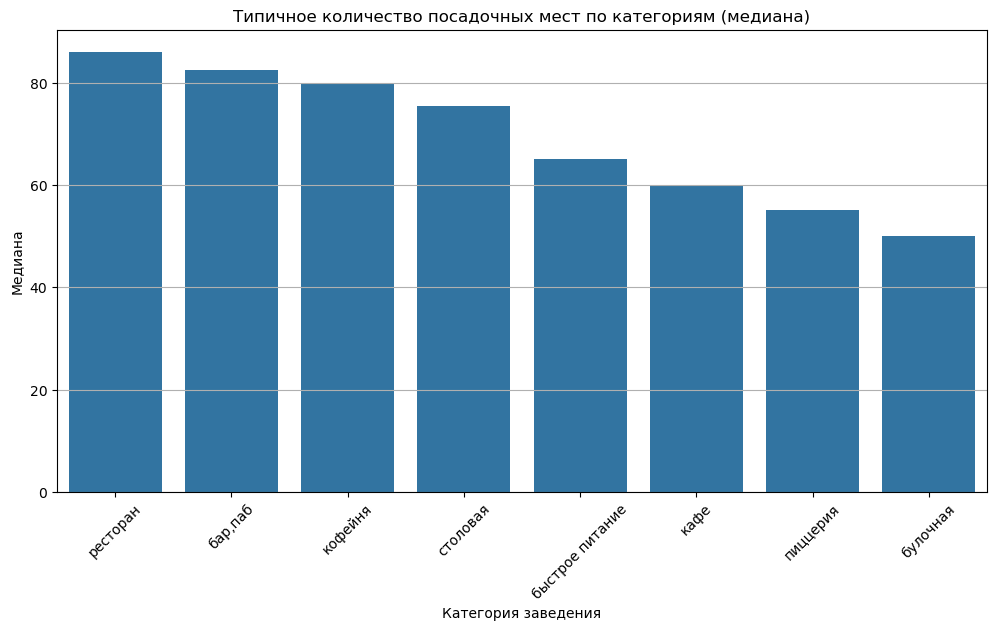

In [66]:
# График типичного количества посадочных мест
plt.figure(figsize=(12, 6))

# Построим диаграмму размаха («ящик с усами»)
sns.barplot(data=typical_seats_sorted,
            x='category', 
            y='median_seats')

plt.xticks(rotation=45)
plt.title('Типичное количество посадочных мест по категориям (медиана)')
plt.xlabel('Категория заведения')
plt.ylabel('Медиана')

plt.grid(axis='y')

# Выводим график
plt.show()

**Промежуточные наблюдения**

1. Визуализация распределения.
- На диаграмме размаха видно, что в каждой категории есть значительные выбросы, особенно в категориях "кафе", "рестораны", "кофейни" и "столовые". Эти выбросы связаны с заведениями, имеющими аномально большое количество посадочных мест (до 1288).
---

2. Выбросы.
- Выбросы обнаружены в каждой категории. Например:
  - Кафе: заведения с 240, 350 и 226 местами.
  - Рестораны: заведения с 350 и 428 местами.
  - Столовые: заведения с 320, 350 и 428 местами.
- Эти выбросы могут быть связаны с:
  - Ошибками в данных (например, некорректное указание количества мест).
  - Наличием очень крупных заведений (например, рестораны или кафе в торговых центрах или на вокзалах).
---

3. Типичное количество посадочных мест (медиана).
- **Кафе**: 0 мест (возможно, заведения работают на вынос).
- **Рестораны**: 43 места.
- **Кофейни**: 6 мест.
- **Бары/пабы**: 40 мест.
- **Пиццерии**: 30 мест.
- **Быстрое питание**: 10 мест.
- **Столовые**: 6 мест.
- **Булочные**: 9 мест.
---

4. Выводы.
- Аномалии и выбросы:
   - В данных присутствуют аномально большие значения посадочных мест (до 1288), которые искажают средние значения.
   - Эти выбросы могут быть связаны с ошибками в данных или наличием очень крупных заведений (например, рестораны в торговых центрах).

- Типичные значения:
   - Большинство заведений имеют небольшое количество посадочных мест:
     - Кафе: 0 мест (возможно, заведения работаю на вынос).
     - Кофейни: 6 мест.
     - Быстрое питание: 10 мест.
     - Столовые: 6 мест.
     - Булочные: 9 мест.
   - Рестораны и бары/пабы имеют больше мест (медиана 43 и 40 соответственно).


---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [69]:
# Выводим средний рейтинг по каждой категории
avg_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False).reset_index()

display('Средний рейтинг по каждой категории:')
display(avg_rating)

'Средний рейтинг по каждой категории:'

,category,rating
0,"бар,паб",4.387712
1,пиццерия,4.301264
2,ресторан,4.290357
3,кофейня,4.277282
4,булочная,4.268359
5,столовая,4.211429
6,кафе,4.123886
7,быстрое питание,4.050249


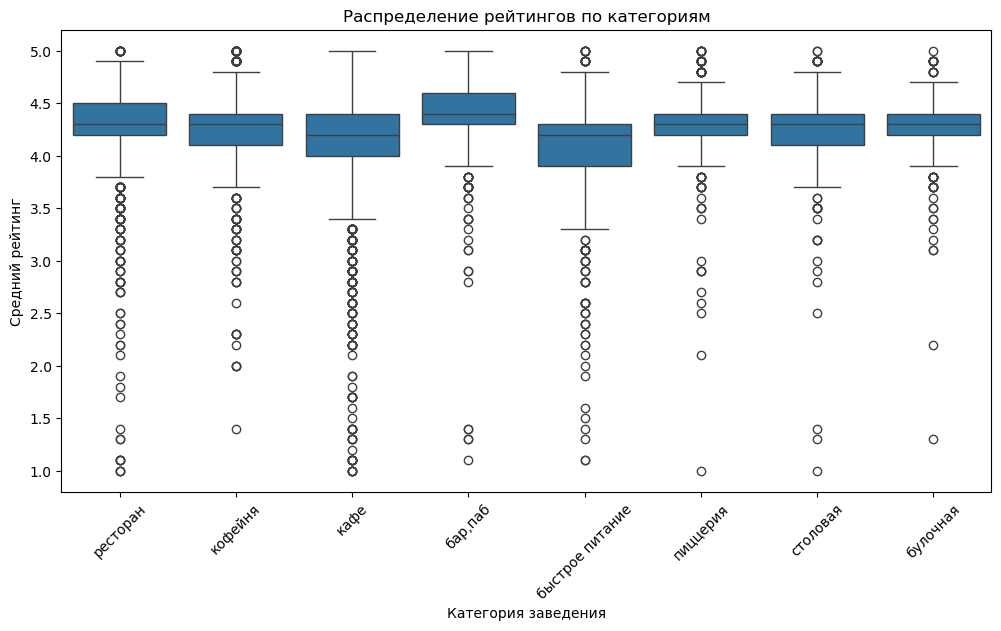

In [70]:
# Вызуализация распределение рейтингов по категориям
plt.figure(figsize=(12, 6))

# Построим диаграмму размаха («ящик с усами»)
sns.boxplot(data=df, 
            x='category',
            y='rating')

plt.xticks(rotation=45)
plt.title('Распределение рейтингов по категориям')
plt.xlabel('Категория заведения')
plt.ylabel('Средний рейтинг')


# Выводим график
plt.show()

**Промежуточные наблюдения**

1. Средние рейтинги по категориям:
- **Бар/паб**: 4.39 (самый высокий рейтинг).
- **Пиццерия**: 4.30.
- **Ресторан**: 4.29.
- **Кофейня**: 4.28.
- **Булочная**: 4.27.
- **Столовая**: 4.21.
- **Кафе**: 4.12.
- **Быстрое питание**: 4.05 (самый низкий рейтинг).

---

2. Анализ различий:
- **Наибольший рейтинг**: Бары/пабы имеют самый высокий средний рейтинг (4.39). Это может быть связано с тем, что такие заведения часто предлагают уникальную атмосферу, напитки и развлечения, что повышает удовлетворённость клиентов.
- **Высокие рейтинги**: Пиццерии, рестораны и кофейни также имеют высокие рейтинги (4.30–4.28). Это говорит о том, что клиенты довольны качеством еды, сервисом и атмосферой в этих заведениях.
- **Средние рейтинги**: Булочные и столовые имеют рейтинги около 4.27 и 4.21 соответственно. Это может быть связано с тем, что такие заведения ориентированы на доступность и простоту, что может ограничивать уровень сервиса или разнообразие меню.
- **Наименьший рейтинг**: Быстрое питание имеет самый низкий рейтинг (4.05). Это может быть связано с тем, что клиенты ожидают от таких заведений скорости и доступности, а не высокого качества еды или сервиса.

---

3. Различия между категориями:
- Разница между самым высоким (бары/пабы — 4.39) и самым низким (быстрое питание — 4.05) рейтингом составляет **0.34 балла**. Это не очень большое различие, но оно статистически значимо.
- Категории с рейтингами выше 4.2 (бары/пабы, пиццерии, рестораны, кофейни) можно считать более успешными с точки зрения удовлетворённости клиентов.
- Категории с рейтингами ниже 4.2 (булочные, столовые, кафе, быстрое питание) могут требовать улучшений в качестве еды, сервисе или атмосфере.

---

5. Вывод:
    - **Бары/пабы** лидируют по среднему рейтингу (4.39), что может быть связано с их уникальной атмосферой и предложениями.
    - **Пиццерии, рестораны и кофейны** также имеют высокие рейтинги (4.30–4.28), что говорит о высоком уровне удовлетворённости клиентов.
    - **Булочные и столовые** имеют средние рейтинги (4.27 и 4.21), что может быть связано с их ориентацией на доступность и простоту.
    - **Быстрое питание** имеет самый низкий рейтинг (4.05), что может быть связано с ожиданиями клиентов (скорость и доступность важнее качества).

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [73]:
correlation_matrix = df[['category', 'district', 'chain', 
                        'seats','price', 'rating', 'is_24_7']].phik_matrix()
display(correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False))

interval columns not set, guessing: ['chain', 'seats', 'rating']


,rating
price,0.220295
district,0.200691
category,0.190003
is_24_7,0.150173
chain,0.108092
seats,0.000000


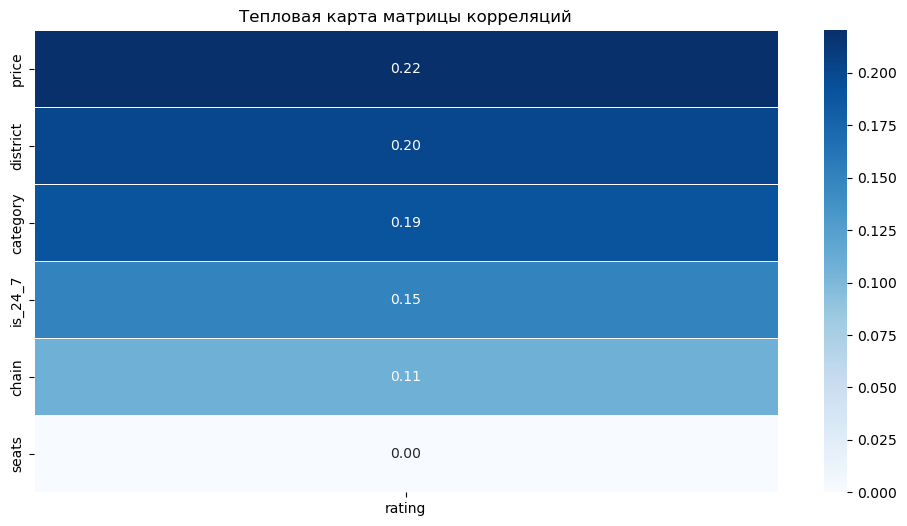

In [74]:
df_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
plt.figure(figsize=(12, 6))

sns.heatmap(df_heatmap,
            annot=True,
            fmt='.2f',
            cmap='Blues',
            linewidths=0.5)
plt.title('Тепловая карта матрицы корреляций')

plt.show()

In [75]:
# Проверка самой сильной связи
strongest_corr_feature = df_heatmap.index[0]  # Самый сильный коррелятор
display(f"Самая сильная корреляция с рейтингом: {strongest_corr_feature}")

'Самая сильная корреляция с рейтингом: price'

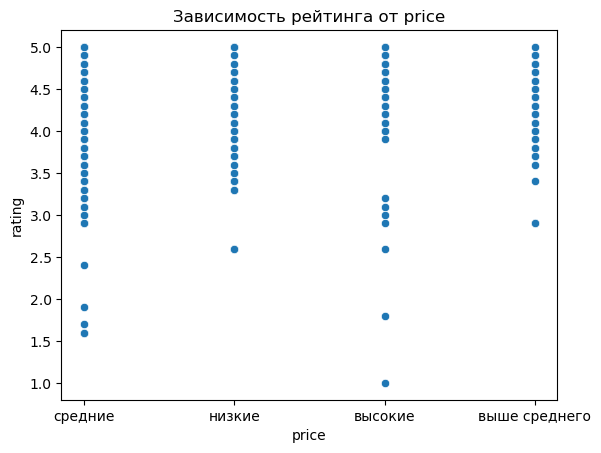

In [76]:
# Визуализация связи
sns.scatterplot(x=df[strongest_corr_feature], y=df['rating'])
plt.title(f'Зависимость рейтинга от {strongest_corr_feature}')
plt.show()

**Промежуточные наблюдения**

1. Корреляция с рейтингом: Наибольшая корреляция с рейтингом наблюдается у признака **price** (0.220295), что указывает на то, что цена имеет наибольшее влияние на рейтинг среди всех рассмотренных признаков. За ним следуют **district** (0.200691) и **category** (0.190003). Признак **seats** не показывает значимой корреляции с рейтингом (0.000000).

2. Визуализация зависимости: График зависимости рейтинга от цены (scatter plot) позволяет визуально оценить, как изменяется рейтинг в зависимости от цены. 

**Итог:** Таким образом, цена является наиболее значимым фактором, влияющим на рейтинг, но также стоит учитывать влияние других переменных для более полного понимания.

---
### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [79]:
# Группировка по названию сети и подсчет количества заведений
top_df = df['name'].value_counts().head(15).reset_index()
# Переименование столбцов
top_df.columns = ['Название сети', 'Количество заведений']
display(top_df)

,Название сети,Количество заведений
0,кафе,189
1,шоколадница,120
2,домино'с пицца,77
3,додо пицца,74
4,one price coffee,72
5,яндекс лавка,69
6,cofix,65
7,prime,50
8,хинкальная,44
9,шаурма,43


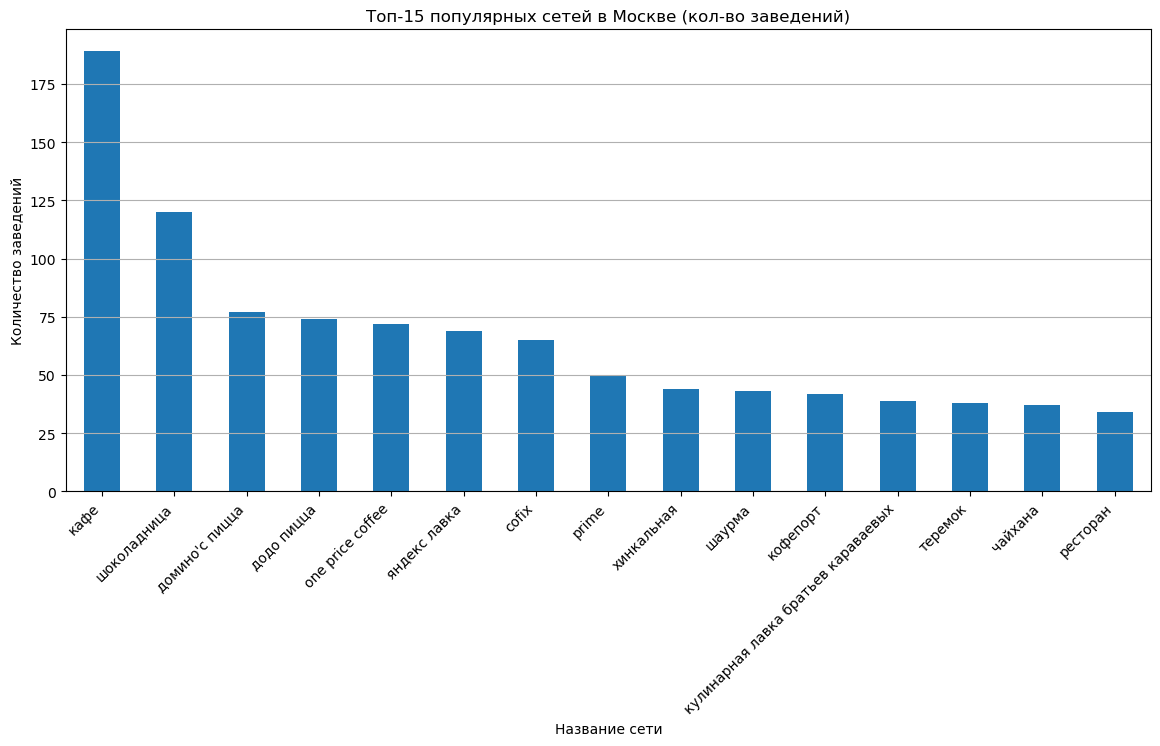

In [80]:
# Диаграмма для топ-15 сетей
top_df.plot(kind='bar', 
            x='Название сети', 
            y='Количество заведений', 
            legend=False,
            figsize=(14, 6)
           )

plt.title('Топ-15 популярных сетей в Москве (кол-во заведений)')
plt.xlabel('Название сети')
plt.ylabel('Количество заведений')
plt.xticks(rotation=45, ha='right')

plt.grid(axis='y')

plt.show()

In [81]:
# Расчет среднего рейтинга для каждой сети
rating_df = df.groupby('name')['rating'].mean().reset_index()
rating_df.columns = ['Название сети', 'Средний рейтинг']

# Внутреннее соединение (inner join) с top_df, чтобы оставить только топ-15 сетей
rating_top_df = pd.merge(top_df, rating_df, on='Название сети', how='inner')

# Сорторовка по среднему рейтингу
rating_top_df = rating_top_df.sort_values(by= 'Средний рейтинг', ascending=False)

display(rating_top_df)

,Название сети,Количество заведений,Средний рейтинг
11,кулинарная лавка братьев караваевых,39,4.394872
8,хинкальная,44,4.322727
14,ресторан,34,4.314706
3,додо пицца,74,4.286486
1,шоколадница,120,4.177500
2,домино'с пицца,77,4.171429
10,кофепорт,42,4.147619
12,теремок,38,4.123684
7,prime,50,4.116000
6,cofix,65,4.075385


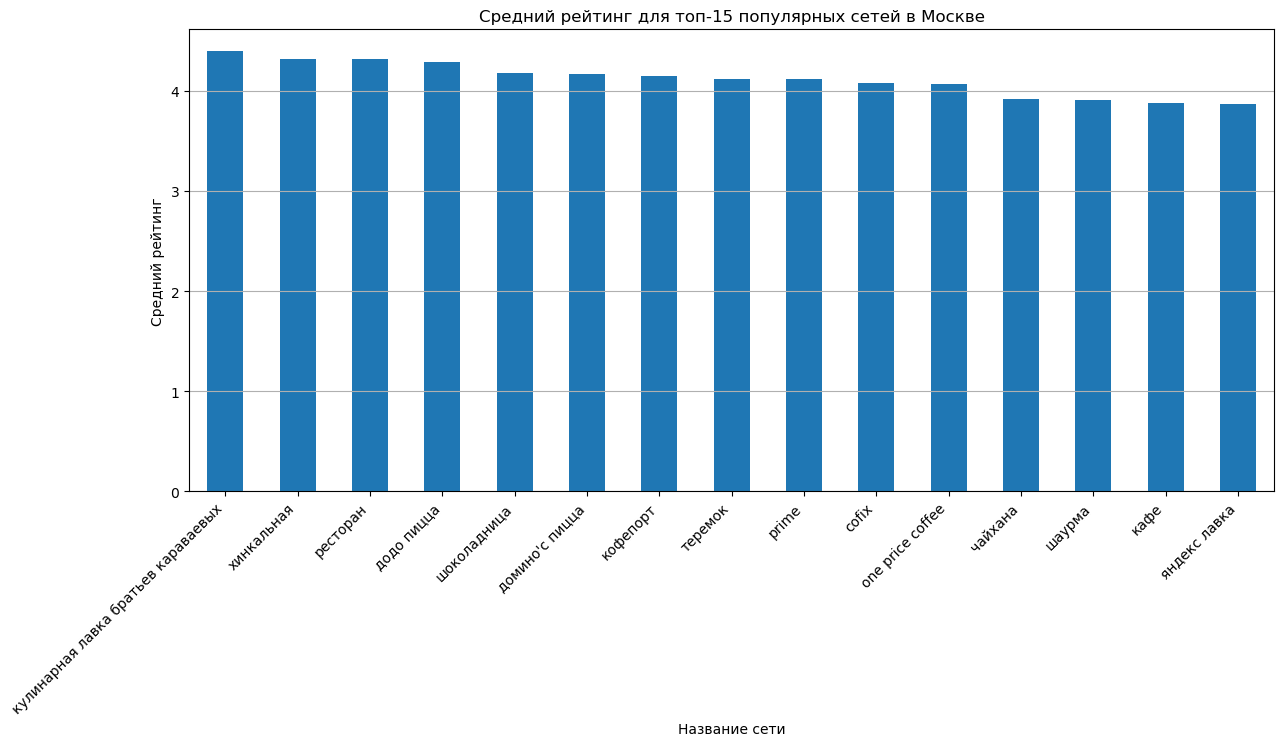

In [82]:
# Диаграмма для среднего рейтинга топ-15 сетей
rating_top_df.plot(kind='bar', 
                   x='Название сети',
                   y='Средний рейтинг',
                   legend=False,
                   figsize=(14, 6)
                  )

plt.title('Средний рейтинг для топ-15 популярных сетей в Москве')
plt.xlabel('Название сети')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45, ha='right')

plt.grid(axis='y')

plt.show()

In [83]:
# Добавление категории заведений
category_df = df.groupby('name')['category'].first().reset_index()
category_df.columns = ['Название сети', 'Категория']

# Внутреннее соединение с rating_top_df
final_df = pd.merge(rating_top_df, category_df, on='Название сети', how='inner')

display(final_df)

,Название сети,Количество заведений,Средний рейтинг,Категория
0,кулинарная лавка братьев караваевых,39,4.394872,кафе
1,хинкальная,44,4.322727,быстрое питание
2,ресторан,34,4.314706,ресторан
3,додо пицца,74,4.286486,пиццерия
4,шоколадница,120,4.177500,кофейня
5,домино'с пицца,77,4.171429,пиццерия
6,кофепорт,42,4.147619,кофейня
7,теремок,38,4.123684,ресторан
8,prime,50,4.116000,ресторан
9,cofix,65,4.075385,кофейня


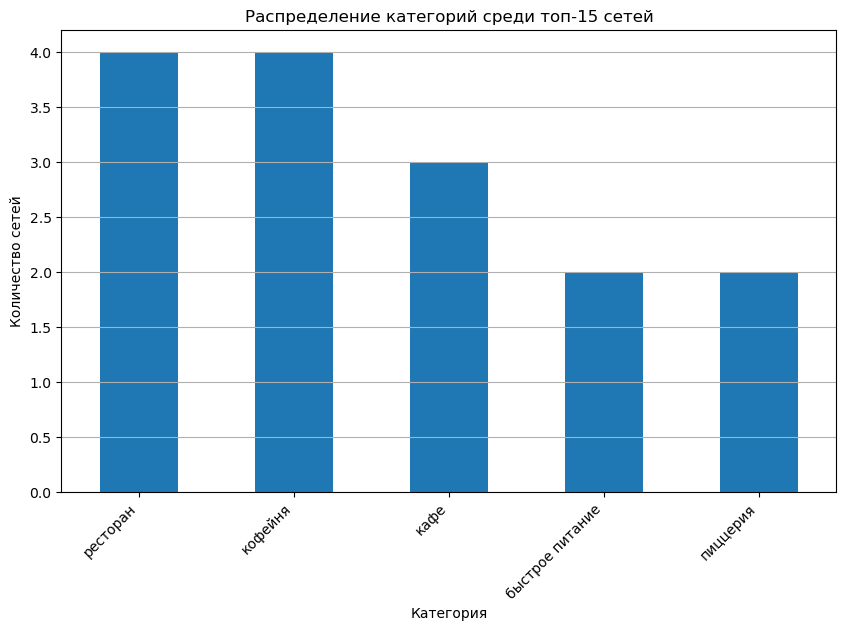

In [84]:
# Визуализация категорий
final_df['Категория'].value_counts().plot(kind='bar', 
                                          figsize=(10, 6), 
                                          title='Распределение категорий среди топ-15 сетей')
plt.xlabel('Категория')
plt.ylabel('Количество сетей')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

**Промежуточные наблюдения**

1. Популярность сетей:
    - В Москве наиболее популярными сетями заведений являются кафе, кофейни и пиццерии. Сеть "кафе" лидирует по количеству заведений (189), за ней следуют "шоколадница" (120) и "домино'с пицца" (77). Это говорит о том, что данные категории заведений востребованы среди жителей и гостей города.

2. Средний рейтинг: 
    - Среди топ-15 сетей, средний рейтинг варьируется от 3.88 до 4.39. Наивысший средний рейтинг у сети "кулинарная лавка братьев караваевых" (4.39), что указывает на высокое качество обслуживания или продукции. Сети с низким рейтингом, такие как "яндекс лавка" (3.87) и "шаурма" (3.91), возможно, требуют улучшения качества услуг или продукции.

3. Категории заведений: 
    - Большинство топ-15 сетей относятся к категориям "кафе", "кофейня" и "пиццерия". Это подтверждает, что данные типы заведений наиболее распространены и популярны в Москве. Также присутствуют сети из категорий "быстрое питание" и "ресторан", что показывает разнообразие предпочтений потребителей.

Можно сделать вывод, что кафе, кофейни и пиццерии являются наиболее популярными и востребованными типами заведений в Москве, при этом качество их услуг и продукции варьируется, что отражено в средних рейтингах.

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [87]:
# Групируем данные по районам и среднему чеку
avg_middle_avg_bill_df = df.groupby('district')['middle_avg_bill'].mean().reset_index()
avg_middle_avg_bill_df.columns = ['Административный район','Средний чек']
avg_middle_avg_bill_df = avg_middle_avg_bill_df.sort_values(by='Средний чек', ascending=False)
display(avg_middle_avg_bill_df)

,Административный район,Средний чек
5,Центральный административный округ,1191.057547
1,Западный административный округ,1053.225490
2,Северный административный округ,927.959627
8,Южный административный округ,834.398089
4,Северо-Западный административный округ,822.222930
0,Восточный административный округ,820.626923
7,Юго-Западный административный округ,792.561702
3,Северо-Восточный административный округ,716.611296
6,Юго-Восточный административный округ,654.097938


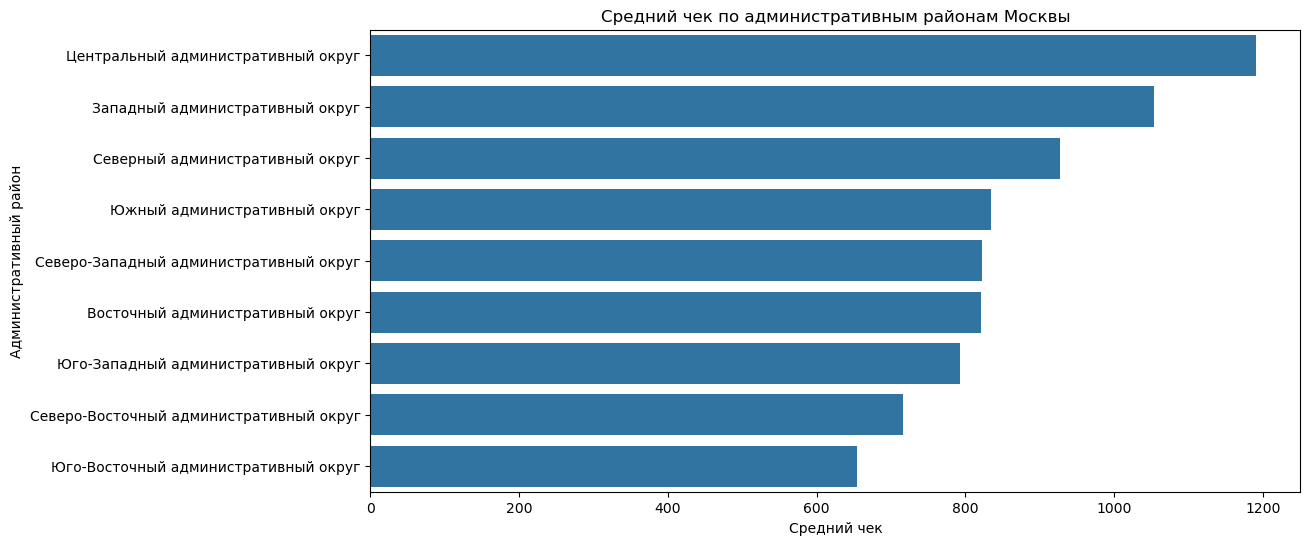

In [88]:
# Столбчатая диаграмма
plt.figure(figsize=(12, 6))

sns.barplot(data=avg_middle_avg_bill_df,
            x='Средний чек',
            y='Административный район'
            )

plt.title('Средний чек по административным районам Москвы')
plt.xlabel('Средний чек')
plt.ylabel('Административный район')

plt.show()

In [89]:
# Удаленность от центра 
# Создаем новый столбец is_central с булевыми значениями True = ЦАО, False = не ЦАО
df['is_central'] = df['district'] == 'Центральный административный округ'
# Групировка и расчет среднего чека
central_vs_others = df.groupby('is_central')['middle_avg_bill'].mean().reset_index()  
central_vs_others.columns = ['Центральный округ', 'Средний чек']
display(central_vs_others)

,Центральный округ,Средний чек
0,False,839.822882
1,True,1191.057547


/var/folders/fs/8_9dtjjn0y107q167vwpdcdr0000gn/T/ipykernel_22297/2405337739.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=central_vs_others,


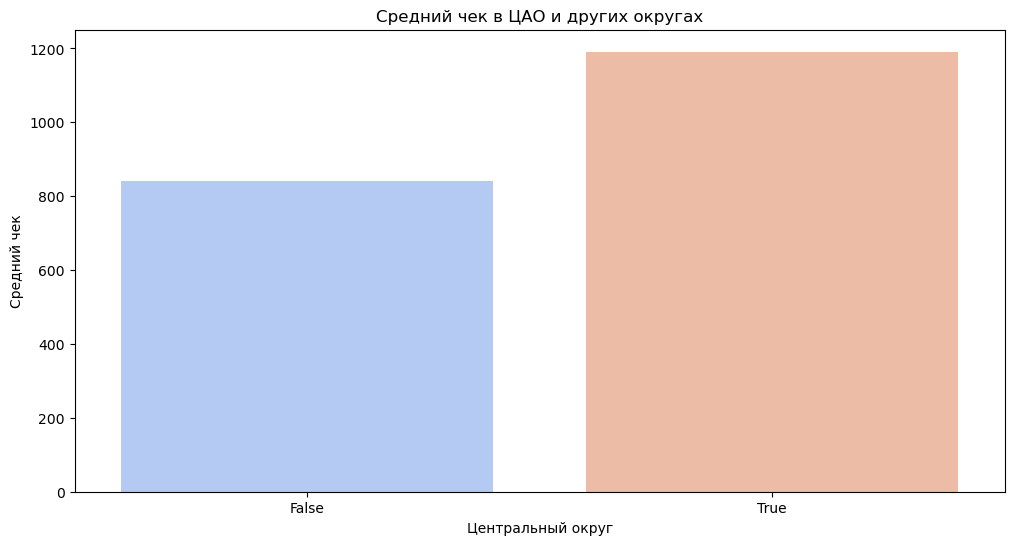

In [90]:
# Визуализация
plt.figure(figsize=(12, 6))

sns.barplot(data=central_vs_others,
            x='Центральный округ',
            y='Средний чек',
            palette='coolwarm')

plt.title('Средний чек в ЦАО и других округах')
plt.xlabel('Центральный округ')
plt.ylabel('Средний чек')

plt.show()

- Удаленность от центра напрямую влияет на цены в заведениях. Чем ближе к центру тем выше средний чек.

 - Это связано с:
   - Престижностью локации.
   - Высокой арендной платой.
   - Большим количеством туристов и состоятельных клиентов.
   - В удаленных округах цены ниже из-за меньшего трафика, более низких доходов населения и меньшей конкуренции среди заведений. 

---

### Промежуточный вывод

1. **Категории заведений и их распределение:**
   - В данных представлены различные категории заведений общественного питания, среди которых наиболее распространены **кафе (2378)** и **рестораны (2043)**. Меньше всего заведений в категориях **булочная (256)** и **столовая (315)**.
   - Визуализация распределения заведений по категориям показывает, что кафе и рестораны доминируют на рынке, что может быть связано с их популярностью и востребованностью среди потребителей.

2. **Распределение заведений по административным округам Москвы:**
   - Наибольшее количество заведений сосредоточено в **Центральном административном округе (2242)**, что объясняется высокой концентрацией туристов, бизнеса и престижностью локации.
   - В остальных округах количество заведений распределено более равномерно, с небольшим перевесом в сторону **Северного (900)** и **Южного (892)** административных округов.

3. **Соотношение сетевых и несетевых заведений:**
   - **Несетевых заведений больше (5201)**, чем сетевых (3205). Это говорит о том, что рынок общественного питания в Москве в значительной степени состоит из локальных и независимых заведений.
   - Наибольшая доля сетевых заведений наблюдается в категориях **булочная (61.33%)**, **пиццерия (52.13%)** и **кофейня (50.96%)**. Это может быть связано с популярностью франшиз и стандартизированных форматов в этих категориях.

4. **Рейтинги заведений:**
   - Наивысшие средние рейтинги у **баров/пабов (4.39)** и **пиццерий (4.30)**, что может быть связано с их уникальной атмосферой и качеством обслуживания.
   - Самый низкий рейтинг у заведений **быстрого питания (4.05)**, что может указывать на более низкое качество еды или сервиса в этой категории.

5. **Влияние локации на цены:**
   - **Цены в заведениях напрямую зависят от их удаленности от центра.** Чем ближе к центру, тем выше средний чек, что связано с престижностью локации, высокой арендной платой и большим количеством туристов. В удаленных округах цены ниже из-за меньшего трафика и более низких доходов населения.

**Важные выводы:**
- Кафе и рестораны являются наиболее распространенными категориями заведений, при этом сетевые заведения чаще встречаются в категориях булочных, пиццерий и кофеен.
- Центральный административный округ лидирует по количеству заведений, что связано с его привлекательностью для бизнеса и туристов.
- Качество обслуживания и атмосфера в барах/пабах и пиццериях оцениваются выше, чем в заведениях быстрого питания, что может быть важно для улучшения качества услуг в последних.
- Локация заведения играет ключевую роль в формировании цен, что важно учитывать при открытии новых заведений.

## 4. Итоговый вывод и рекомендации

В рамках исследования был проведен анализ двух датасетов, содержащих информацию о заведениях общественного питания в Москве: `/datasets/rest_info.csv` (8406 строк) и `/datasets/rest_price.csv` (4058 строк). Были выполнены следующие этапы:

1. Первичный анализ данных: проверка типов данных, обработка пропусков, анализ дубликатов.
2. Исследование распределения заведений по категориям и административным округам.
3. Анализ сетевых и несетевых заведений.
4. Изучение распределения посадочных мест и рейтингов заведений.
5. Анализ средних чеков и их зависимости от расположения заведений.

**Главные выводы**
1. *Распределение заведений по категориям и округам*:
   - Наиболее популярные категории заведений: кафе (2378), рестораны (2043) и кофейни (1413).
   - Центральный административный округ лидирует по количеству заведений (2242), что связано с высокой концентрацией туристов и бизнеса.
   - В удаленных округах (например, Северо-Западный) количество заведений значительно меньше (409).

2. *Сетевые и несетевые заведения*:
   - Несетевых заведений больше (5201), чем сетевых (3205).
   - Наибольшая доля сетевых заведений наблюдается в категориях: булочные (61.33%), пиццерии (52.13%) и кофейни (50.96%).

3. *Посадочные места и рейтинги*:
   - В данных присутствуют выбросы по количеству посадочных мест (до 1288), что может быть связано с ошибками или наличием крупных заведений.
   - Типичное количество мест: кафе (0, возможно, заведения на вынос), рестораны (43), кофейни (6).
   - Самый высокий средний рейтинг у баров/пабов (4.39), самый низкий — у заведений быстрого питания (4.05).

4. *Средние чеки и расположение*:
   - Цены в заведениях напрямую зависят от их расположения: чем ближе к центру, тем выше средний чек.
   - Это связано с престижностью локации, высокой арендной платой и большим количеством туристов.

5. *Популярные сети*:
   - Наиболее популярные сети: кафе (189 заведений), "Шоколадница" (120) и "Домино'с Пицца" (77).
   - Сети с высоким рейтингом (например, "Кулинарная лавка братьев Караваевых" — 4.39) демонстрируют высокое качество обслуживания.

***Рекомендации***
1. *Для открытия нового заведения*:
   - Рассмотреть категории с высокой популярностью и рейтингом: кафе, кофейни и пиццерии.
   - Обратить внимание на Центральный административный округ для размещения, если целевая аудитория — туристы и состоятельные клиенты. Для более бюджетного формата подойдут удаленные округа.
   - Учитывать количество посадочных мест: для кафе и кофеен достаточно 6–10 мест, для ресторанов — 40–50.

2. *Для улучшения качества услуг*:
   - Заведениям быстрого питания и столовых стоит обратить внимание на повышение качества еды и сервиса, так как их рейтинги ниже среднего.
   - Сетям с низким рейтингом (например, "Яндекс Лавка") рекомендуется провести анализ жалоб клиентов и улучшить качество продукции.

3. *Для анализа конкуренции*:
   - Изучить успешные сети (например, "Кулинарная лавка братьев Караваевых") для выявления лучших практик.
   - Обратить внимание на булочные и пиццерии, где высока доля сетевых заведений, что может указывать на высокую конкуренцию.

4. *Для работы с пропусками в данных*:
   - Для столбцов с большим количеством пропусков (например, `middle_coffee_cup`) рассмотреть возможность сбора дополнительных данных или использования методов импутации.

**Итог**
- Проведенный анализ позволил выявить ключевые закономерности в данных о заведениях общественного питания Москвы. Основные рекомендации направлены на выбор категории и локации для нового заведения, улучшение качества услуг и анализ успешных конкурентов. Учет этих факторов поможет заказчику принять обоснованные решения для развития бизнеса.